# Sentinel-2 Basics

Goals of the lecture:
1. Use and download a tile from the open and free [Copernicus Dataspace](https://dataspace.copernicus.eu/) page
1. Understand the structure of the downloaded data
1. Programmatically access a specific band of the downloaded tile
1. Visualize a Sentinel-2 band


## Copernicus

Take a look at [browser.dataspace.copernicus.eu](https://browser.dataspace.copernicus.eu/?):

![copernicus landing page](https://raw.githubusercontent.com/wiki/kai-tub/ip4rs-dependencies/copernicus_ds_browser.png)

To download a specific satellite tile, we have to:
1. Sign up for the service (confirm the registration _e-mail_!)
1. Query Copernicus to select tiles from target satellite with relevant parameters 

To select the Sentinel-2 satellite, tick the `Mission: Sentinel-2` box and use the following filter to further limit the results only to the Sentinel-2A satellite with a cloud-cover percentage of < 15%:

![sentinel-2 example filter](https://raw.githubusercontent.com/wiki/kai-tub/ip4rs-dependencies/copernicus_ds_filter.png)

After providing the advanced search filters, you will get a list of various matching Sentinel-2 tiles:

![example results](https://raw.githubusercontent.com/wiki/kai-tub/ip4rs-dependencies/copernicus_ds_filter_results.png)

If you inspect (small ⓘ icon) one of the tiles, you will see a footprint of the geographical extent of the tile, as well as a quick RGB preview image (if available) and a short textual summary:

![example tile](https://raw.githubusercontent.com/wiki/kai-tub/ip4rs-dependencies/copernicus_ds_tile.png)




## Downloading & inspecting the Sentinel-2 data

If the selected _tile_ is available (no `offline` tag), it can be directly downloaded as a `zip` file.
After extracting the zip file, the folder structure ([SAFE format](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/data-formats)) will look like:

```
[831M]  S2A_MSIL2A_20240308T100841_N0510_R022_T33UUU_20240308T143352.SAFE
├── [ 23M]  DATASTRIP
│   └── ...
├── [807M]  GRANULE
│   └── [807M]  L2A_T33UUU_A045493_20240308T101546
│       ├── [8.5K]  AUX_DATA
│       │   ├── [2.9K]  AUX_CAMSFO
│       │   └── [1.6K]  AUX_ECMWFT
│       ├── [806M]  IMG_DATA
│       │   ├── [494M]  R10m
│       │   │   ├── [340K]  T33UUU_20240308T100841_AOT_10m.jp2
│       │   │   ├── [ 73M]  T33UUU_20240308T100841_B02_10m.jp2
│       │   │   ├── [ 75M]  T33UUU_20240308T100841_B03_10m.jp2
│       │   │   ├── [ 77M]  T33UUU_20240308T100841_B04_10m.jp2
│       │   │   ├── [ 91M]  T33UUU_20240308T100841_B08_10m.jp2
│       │   │   ├── [118M]  T33UUU_20240308T100841_TCI_10m.jp2
│       │   │   └── [ 59M]  T33UUU_20240308T100841_WVP_10m.jp2
│       │   ├── [271M]  R20m
│       │   │   ├── [317K]  T33UUU_20240308T100841_AOT_20m.jp2
│       │   │   ├── [ 12M]  T33UUU_20240308T100841_B01_20m.jp2
│       │   │   ├── [ 21M]  T33UUU_20240308T100841_B02_20m.jp2
│       │   │   ├── [ 21M]  T33UUU_20240308T100841_B03_20m.jp2
│       │   │   ├── [ 22M]  T33UUU_20240308T100841_B04_20m.jp2
│       │   │   ├── [ 22M]  T33UUU_20240308T100841_B05_20m.jp2
│       │   │   ├── [ 24M]  T33UUU_20240308T100841_B06_20m.jp2
│       │   │   ├── [ 25M]  T33UUU_20240308T100841_B07_20m.jp2
│       │   │   ├── [ 23M]  T33UUU_20240308T100841_B11_20m.jp2
│       │   │   ├── [ 23M]  T33UUU_20240308T100841_B12_20m.jp2
│       │   │   ├── [ 25M]  T33UUU_20240308T100841_B8A_20m.jp2
│       │   │   ├── [2.2M]  T33UUU_20240308T100841_SCL_20m.jp2
│       │   │   ├── [ 31M]  T33UUU_20240308T100841_TCI_20m.jp2
│       │   │   └── [ 19M]  T33UUU_20240308T100841_WVP_20m.jp2
│       │   └── [ 41M]  R60m
│       │       ├── [110K]  T33UUU_20240308T100841_AOT_60m.jp2
│       │       ├── [2.5M]  T33UUU_20240308T100841_B01_60m.jp2
│       │       ├── [2.8M]  T33UUU_20240308T100841_B02_60m.jp2
│       │       ├── [2.9M]  T33UUU_20240308T100841_B03_60m.jp2
│       │       ├── [3.0M]  T33UUU_20240308T100841_B04_60m.jp2
│       │       ├── [3.1M]  T33UUU_20240308T100841_B05_60m.jp2
│       │       ├── [3.3M]  T33UUU_20240308T100841_B06_60m.jp2
│       │       ├── [3.3M]  T33UUU_20240308T100841_B07_60m.jp2
│       │       ├── [3.3M]  T33UUU_20240308T100841_B09_60m.jp2
│       │       ├── [3.3M]  T33UUU_20240308T100841_B11_60m.jp2
│       │       ├── [3.3M]  T33UUU_20240308T100841_B12_60m.jp2
│       │       ├── [3.4M]  T33UUU_20240308T100841_B8A_60m.jp2
│       │       ├── [480K]  T33UUU_20240308T100841_SCL_60m.jp2
│       │       ├── [3.6M]  T33UUU_20240308T100841_TCI_60m.jp2
│       │       └── [2.7M]  T33UUU_20240308T100841_WVP_60m.jp2
│       ├── [364K]  MTD_TL.xml
│       └── [1.2M]  QI_DATA
│           └── ...
├── [166K]  HTML
│   └── ...
├── [ 18K]  INSPIRE.xml
├── [ 68K]  manifest.safe
├── [ 54K]  MTD_MSIL2A.xml
├── [7.3K]  rep_info
│   └── ...
└── [ 19K]  S2A_MSIL2A_20240308T100841_N0510_R022_T33UUU_20240308T143352-ql.jpg

```

## Programmatically accessing bands

### Test importing Python libraries

In [1]:
import numpy as np
import rasterio
import requests
from tqdm.rich import tqdm
from pathlib import Path

If the libraries aren't available, make sure that the `ip4rs` IPython Kernel is selected!

If it is not, change the kernel, e.g., by starting jupyter lab in a different environment!


### Download the tile

In [2]:
data_path = Path("./data")
data_path.mkdir(exist_ok=True)
# For quick prototyping there is on such things as _too many_ asserts!
assert data_path.exists, "Should exist after calling mkdir!"

In [3]:
tile_name = Path("S2A_MSIL2A_20240308T100841_N0510_R022_T33UUU_20240308T143352")
output_filepath = data_path / tile_name.with_suffix(".SAFE.zip")
output_filepath

PosixPath('data/S2A_MSIL2A_20240308T100841_N0510_R022_T33UUU_20240308T143352.SAFE.zip')

In [5]:
# re-hosted file on TUB-Cloud for fast download during class ~800MB before and after unpacking
sentinel_tile_url = "https://tubcloud.tu-berlin.de/s/2EMnZwypF2pK5XG/download/S2A_MSIL2A_20240308T100841_N0510_R022_T33UUU_20240308T143352.SAFE.zip"

# Provided template to download file; not relevant for course
def download_file_with_progress(url: str, output_file: Path):
    """
    Given a `url` as a String and an `output_file` as a file-path the item will
    be downloaded and written to the `output_file`. If the `output_file` already
    exists, it will be overwritten.
    """
    s = requests.Session()
    chunk_size = 2**20  # mb
    with s.get(url, stream=True) as resp:
        with open(output_file, "wb") as f:
            print(f"Saving to {output_file}")
            for data in tqdm(
                resp.iter_content(chunk_size=chunk_size), 
                total=int(resp.headers.get("content-length", 0)) // chunk_size, 
                unit="MB",
                unit_scale=True,
                desc="Downloading...",
            ):
                f.write(data)

download_file_with_progress(url=sentinel_tile_url, output_file=output_filepath)

Output()

Saving to data/S2A_MSIL2A_20240308T100841_N0510_R022_T33UUU_20240308T143352.SAFE.zip


/tmp/ipykernel_3783/4254468417.py:16: TqdmExperimentalWarning: rich is experimental/alpha
  for data in tqdm(


### Extract zipfile

In [8]:
import zipfile

zipf = zipfile.ZipFile(output_filepath)
zipf.extractall(path="data")

BadZipFile: File is not a zip file

Take a look at the folder structure on your laptop / notebook file viewer and understand what happened!

The data inside of the Zip-file is packaged into a "root" directory with the name of the original zip file without the `.zip` but with `.SAFE` extension.
The data we are interested in lives inside a subdirectory called `GRANULE/*/IMG_DATA`.
The image data is encoded as a [jpeg2000](https://de.wikipedia.org/wiki/JPEG_2000) file with the extension `jp2`.

We can combine all of the information to build a [glob](https://en.wikipedia.org/wiki/Glob_(programming)) expression to quickly build a list of the files we are interested in.

Note: The directory structure has changed within the last two years, depending on the selected dates, the relevant images live either directly under the `IMG_DATA` directory, or they live under a sub-directory `IMG_DATA/R{10,20,60}m/`.

In [10]:
unzipped_dir = Path(data_path / tile_name.with_suffix(".SAFE"))
assert unzipped_dir.exists(), f"{unzipped_dir} does not exist!"

## Working with the tile data
### Accessing the data array

In [5]:
# open data pkg without downloading
data_path = Path("./data")
tile_name = Path("S2A_MSIL2A_20240308T100841_N0510_R022_T33UUU_20240308T143352")
unzipped_dir = Path(data_path / tile_name.with_suffix(".SAFE"))

In [6]:
import rasterio
import matplotlib.pyplot as plt


class S2TileReader:
    def __init__(self, directory: Path):
        """
        Initialize the reader with a directory containing the SAFE file of a Sentinel-2 product.

        Parameters
        ----------
        directory : Path
            The directory containing the SAFE file of a Sentinel-2 product.
        """
        assert directory.is_dir(), f"{directory} is not a directory"
        self.image_files = list(directory.glob(f"**/IMG_DATA/*.jp2")) # **递归检索所有，不一定在当前目录下
        if len(self.image_files) == 0:
            self.image_files = list(directory.glob(f"**/IMG_DATA/R60m/*.jp2"))
            self.image_files.extend(list(directory.glob(f"**/IMG_DATA/R20m/*.jp2")))
            self.image_files.extend(list(directory.glob(f"**/IMG_DATA/R10m/*.jp2")))
        self.band2file_mapping = self._bands()
        self.bands = sorted(self.band2file_mapping.keys())
        print(f"{len(self.band2file_mapping)} images found in {directory}")

    def _bands(self):
        """
        Extract the band names from the image files and create a mapping from band name to file path.

        Example:
        {
            "B01": Path("path/to/B01.jp2"),
            "B02": Path("path/to/B02.jp2"),
            ...
        }
        or if the product has multiple resolutions:
        {
            "B01_60m": Path("path/to/R60m/B01.jp2"),
            "B02_10m": Path("path/to/R10m/B02.jp2"),
            ...
        }
        """
        return {"_".join(x.stem.split("_")[2:]):x for x in self.image_files} # 信息位于图片开头

    def read_band(self, band: str):
        """
        Read the data of a specific band. The data is returned as a numpy array. If the band is a single channel,
        the array will have shape (height, width). If the band is a multi-channel band, the array will have shape
        (height, width, channels).

        Parameters
        ----------
        band : str
            The name of the band to read. Must be one of the bands in the product.
            Use the `bands` attribute to see the available bands.
        """
        assert band in self.bands, f"Band {band} invalid. Please select one of {self.bands}"
        img_path = self.band2file_mapping[band]
        with rasterio.open(self.band2file_mapping[band]) as f:
            data = f.read()
        if data.shape[0] == 1:
            return data.squeeze(0) # to (height, width)
        elif data.shape[0] == 3:
            return np.transpose(data, (1, 2, 0)) # to (height,width,3)

In [7]:
tile = S2TileReader(unzipped_dir)
band03_data = tile.read_band("B03_60m")

36 images found in data/S2A_MSIL2A_20240308T100841_N0510_R022_T33UUU_20240308T143352.SAFE


### Visualizing an individual channel

Sentinel-2 satellite data is encoded in an uncommon format `uint16` and requires special care, when trying to visualize.
The minimum and maximum values are given by physical properties of the sensor and are not normalize to fill the entire data range.

In [9]:
band03_data.min(), band03_data.max(), band03_data.shape, band03_data.dtype

(0, 7613, (1830, 1830), dtype('uint16'))

In [10]:
print(band03_data)

[[   0    0    0 ... 1884 1814 1695]
 [   0    0    0 ... 1780 1818 1795]
 [   0    0    0 ... 1781 1760 1783]
 ...
 [   0    0    0 ... 1333 1325 1357]
 [   0    0    0 ... 1340 1351 1349]
 [   0    0    0 ... 1309 1309 1341]]


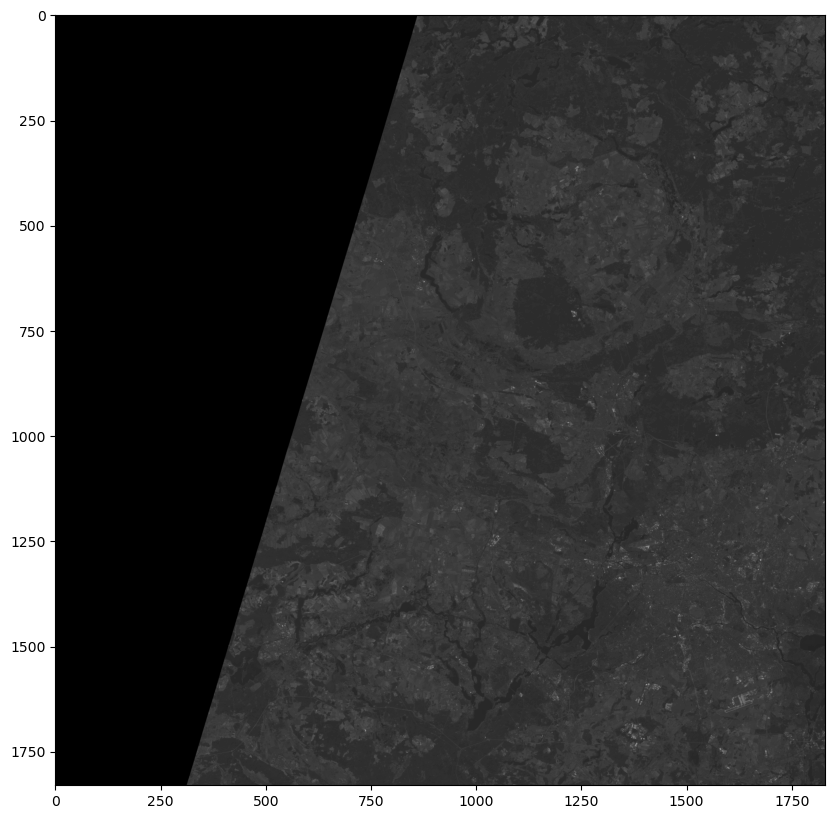

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(band03_data, cmap="gray") # colormap

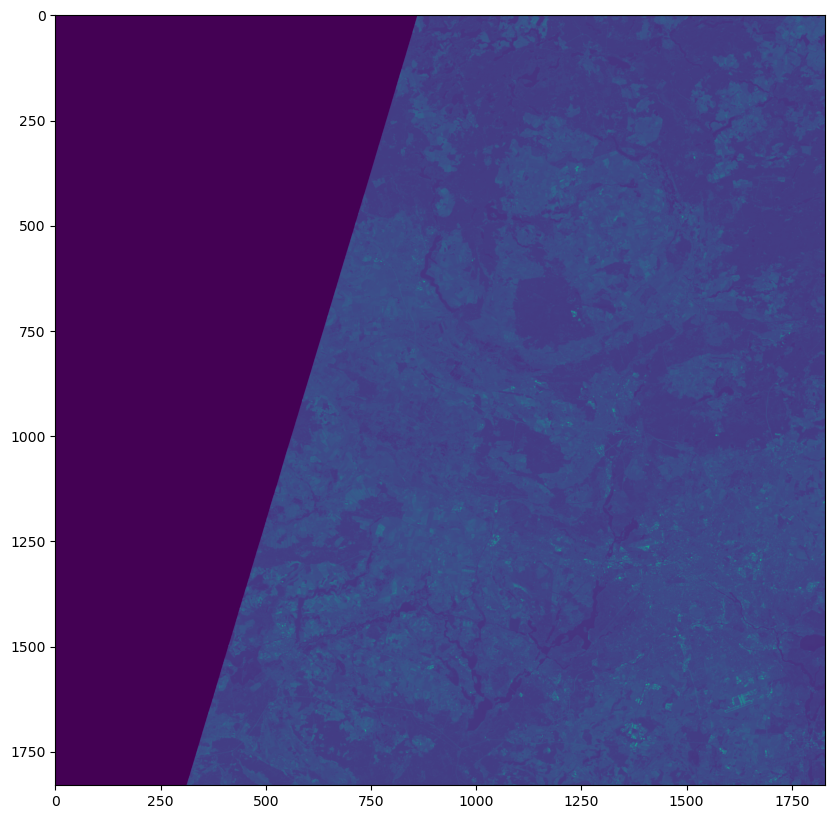

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(band03_data);

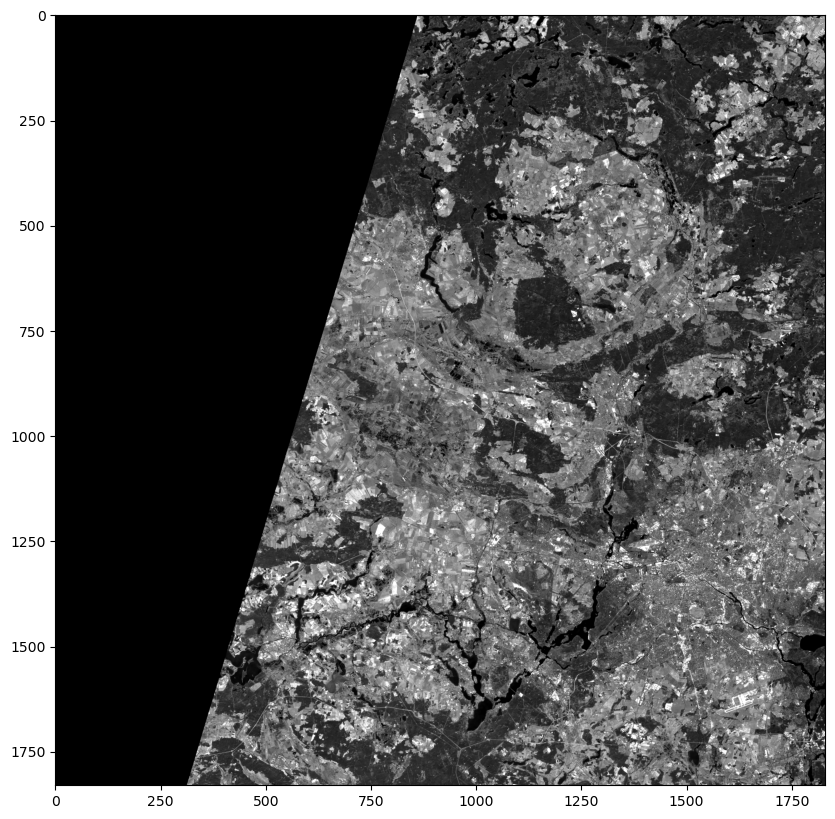

In [13]:
""" 归一化，减少极端值的影响"""
def quant_norm_data(
    data: np.ndarray, lower_quant: float = 0.01, upper_quant: float = 0.99
) -> np.ndarray:
    """
    Normalize the data by quantiles `lower_quant/upper_quant`.
    The quantiles are calculated globally/*across all channels*.
    """
    masked_data = np.ma.masked_equal(data, 0)
    lq, uq = np.quantile(masked_data.compressed(), (lower_quant, upper_quant))
    data = np.clip(data, a_min=lq, a_max=uq)
    data = (data - lq) / (uq - lq)
    return data

# More details follow in the next lab!
plt.figure(figsize=(10, 10))
plt.imshow(quant_norm_data(band03_data), cmap="gray")